In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=300,
                 n_features=2,
                 centers=2,
                 cluster_std=1.0, random_state=101)

In [5]:
X, y = data

In [9]:
np.random.seed(seed = 101)
z_noise = np.random.normal(size = len(X))
z_noise = pd.Series(z_noise)


In [10]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [11]:
features = pd.DataFrame(X)

In [12]:
features

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676
...,...,...
295,1.320546,2.605592
296,-8.043916,-6.010589
297,-9.733566,-7.460380
298,-10.722075,-5.568565


In [13]:
features = pd.concat([features, z_noise], axis = 1)

In [14]:
features.columns = ['X1', 'X2', 'X3']

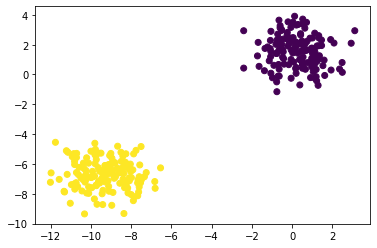

In [16]:
plt.scatter(features['X1'], features['X2'], c = y)

In [17]:
from mpl_toolkits.mplot3d import Axes3D


<Figure size 432x288 with 0 Axes>

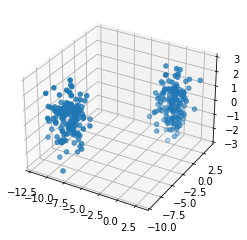

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(features['X1'], features['X2'], features['X3'])

In [22]:
from tensorflow.keras.models import Sequential


In [23]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [24]:
encoder = Sequential()
encoder.add(Dense(units = 2, activation = 'relu', input_shape = [3]))


In [25]:
decoder = Sequential()
decoder.add(Dense(units = 3, activation = 'relu', input_shape = [2]))

In [26]:
autoencoder = Sequential([encoder, decoder])


In [29]:
autoencoder.compile(loss= 'mse', optimizer = SGD(lr=0.5))

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [33]:
scaled_data = scaler.fit_transform(features)

In [34]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2488
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2435
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2412
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2400
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2369


In [35]:
encoded_2dim = encoder.predict(scaled_data)

In [36]:
encoded_2dim

array([[0.7932461 , 0.03199137],
       [0.32918963, 0.72924817],
       [0.3649797 , 0.66584307],
       [0.50938314, 0.16801372],
       [0.4356704 , 0.        ],
       [0.22830734, 0.04096481],
       [0.1869508 , 0.78924584],
       [0.43743762, 0.0269018 ],
       [0.        , 0.799053  ],
       [0.36808538, 0.69133663],
       [0.37181953, 0.07010818],
       [0.20660156, 0.0243525 ],
       [0.24580288, 0.74139744],
       [0.25545794, 0.20990553],
       [0.1695767 , 0.8020172 ],
       [0.55074793, 0.1780498 ],
       [0.25487027, 0.66030365],
       [0.6003012 , 0.67330384],
       [0.6754806 , 0.5585811 ],
       [0.4645619 , 0.734967  ],
       [0.3637953 , 0.02259973],
       [0.48456195, 0.6481641 ],
       [0.        , 0.8170207 ],
       [0.19921106, 0.16038612],
       [0.31561878, 0.        ],
       [0.31913412, 0.71224785],
       [0.23405623, 0.67842174],
       [0.38151383, 0.7584217 ],
       [0.4850935 , 0.05829826],
       [0.34275964, 0.02134071],
       [0.

In [37]:
encoded_2dim.shape


(300, 2)

In [38]:
scaled_data.shape

(300, 3)

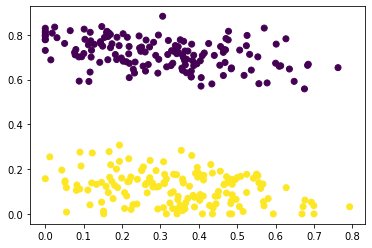

In [40]:
plt.scatter(encoded_2dim[:, 0], encoded_2dim[:, 1], c = y)